# Error Rates of Training and Test Sets

## Error rate of training samples

When k=1, all samples' labels are called "right".

When k become bigger, the fraction of samples called "right" becomes smaller.

The samples that are used to demarcate the space is called "training set".

The fraction with wrong label is called "error rate of training samples".

## Error rate of test samples

After the area of two colors are determined by kNN method with a k value, a new sample is obtained. 

Its label may fit to the area determined previously and may not.

We can have multiple samples that are not in the training set, that are called "test samples"

We can calculate the fraction of new samples whose label do not fit to the area, that is "error rate of test set samples".



# Example

+ n samples
+ 2 features
+ 2 categories
+ Classification

We apply kNN (k=5) method to the data set and check how many samples were labeled wrong (error rate of training samples).

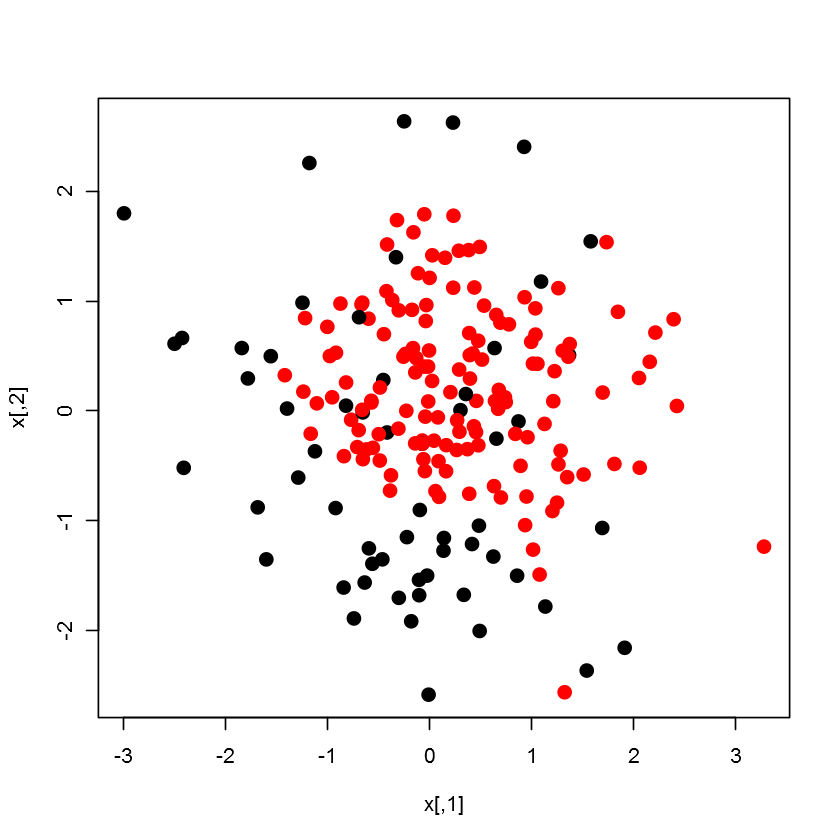

In [9]:
K <- 200
p <- 2
x <- matrix(rnorm(K*p),ncol=p)

ctr1 <- 1
ctr2 <- 0.5
r1 <- 0.2
r2 <- 0.5
v <- r1 * (x[,1]-ctr1)^2 + r2 * (x[,2]-ctr2)^2
t <- 1.2
v0 <- which(v< t)
v1 <- which(v>=t)

gr <- rep(0,K)
p0 <- 0.1
p1 <- 0.9
gr[v0] <- sample(0:1,length(v0),replace=TRUE,prob=c(p0,1-p0))
gr[v1] <- sample(0:1,length(v1),replace=TRUE,prob=c(p1,1-p1))

plot(x,col=gr+1,pch=20,cex=2)



In [10]:
library(class)
# Both 1st and 2nd arguments of knn() function are x
knn.out.training <- knn(x,x, gr, k = 5, prob=TRUE)

cnt.training <- table(gr == knn.out.training)
cnt.training
cnt.training[1]/sum(cnt.training)


FALSE  TRUE 
   24   176 

FALSE 
 0.12

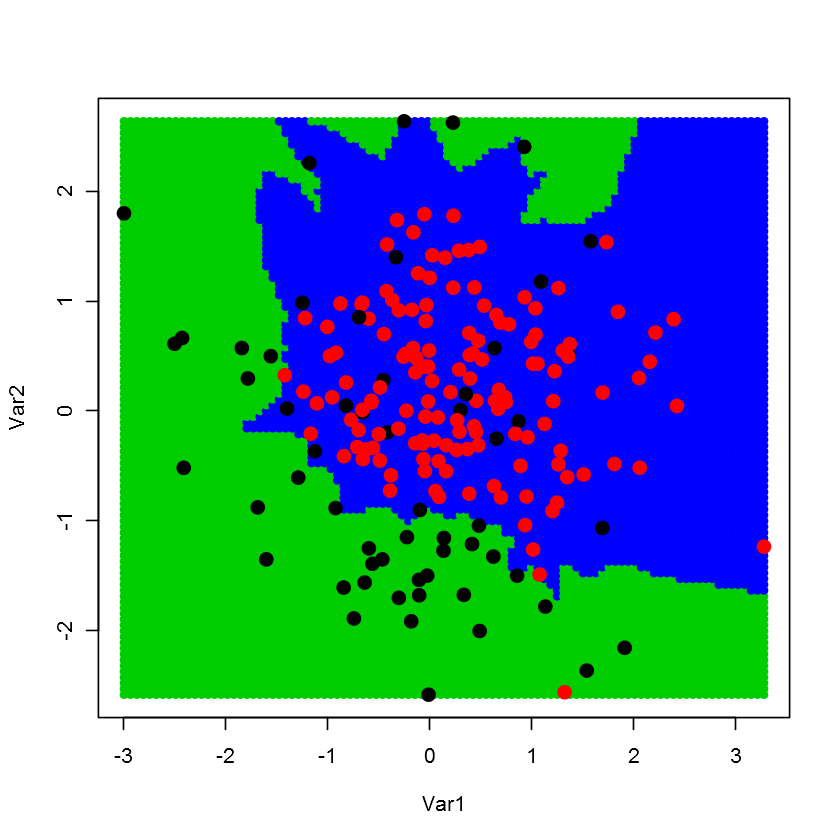

In [13]:
# New sample set (test set)
K <- 200
p <- 2
x.. <- matrix(rnorm(K*p),ncol=p)

ctr1 <- 1
ctr2 <- 0.5
r1 <- 0.2
r2 <- 0.5
v.. <- r1 * (x..[,1]-ctr1)^2 + r2 * (x..[,2]-ctr2)^2
v0.. <- which(v..<t)
v1.. <- which(v..>=t)

gr.. <- rep(0,K)
p0 <- 0.1
p1 <- 0.9
gr..[v0..] <- sample(0:1,length(v0..),replace=TRUE,prob=c(p0,1-p0))
gr..[v1..] <- sample(0:1,length(v1..),replace=TRUE,prob=c(p1,1-p1))


# !st argument is x (training set) and 2nd argument is x.. (test set)
knn.out.test <- knn(x,x.., gr, k = 5, prob=TRUE)
cnt.test <- table(gr == knn.out.test)
cnt.test
cnt.test[1]/sum(cnt.test)


FALSE  TRUE 
   66   134 

FALSE 
 0.33

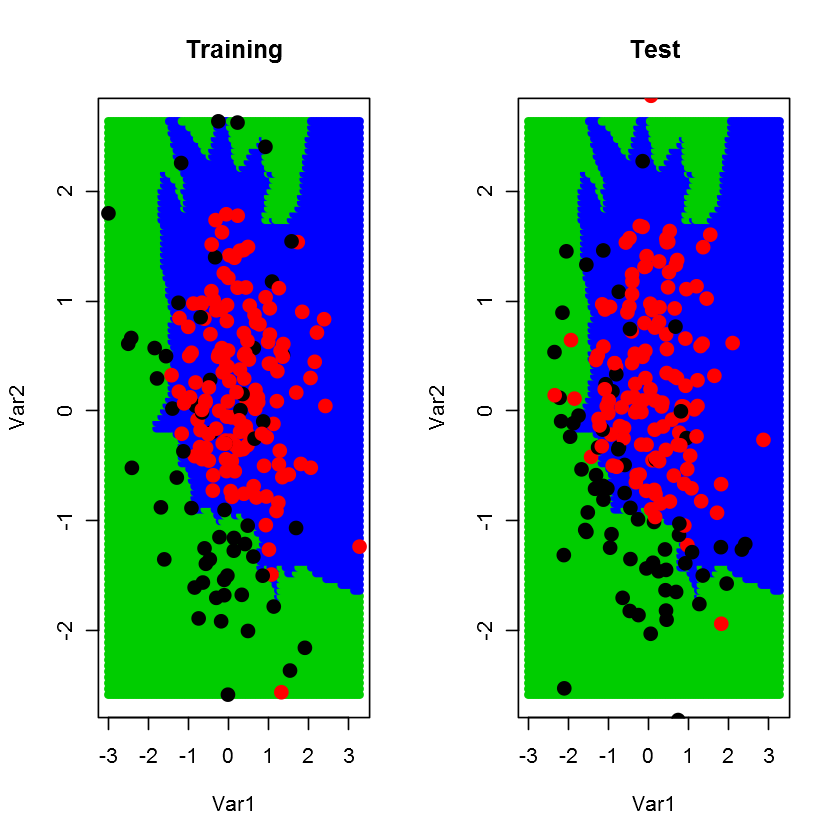

In [16]:
x1. <- seq(from=min(x[,1]),to=max(x[,1]),length=100)
x2. <- seq(from=min(x[,2]),to=max(x[,2]),length=100)
x. <- as.data.frame(expand.grid(x1.,x2.))
knn.out.space <- knn(x,x.,gr,k=5,prob=TRUE)
par(mfcol=c(1,2))
plot(x.,col=as.numeric(knn.out.space)+2,pch=20,main="Training")
points(x,col=gr+1,pch=20,cex=2)
plot(x.,col=as.numeric(knn.out.space)+2,pch=20,main="Test")
points(x..,col=gr..+1,pch=20,cex=2)
par(mfcol=c(1,1))